In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 18 -- Causality ##

## Deflategate ##

In [6]:
football = Table.read_table('deflategate.csv')
football.show()

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [7]:
football = football.drop(1, 2).with_column(
    'Combined', (football.column(1)+football.column(2))/2
    )
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [8]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [9]:
start = np.append(12.5 * np.ones(11), 13 * np.ones(4))
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [10]:
drop_values = start - football.column(1)

In [11]:
football = football.drop('Combined').with_column('Drop', drop_values)

In [12]:
football.show()

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


In [13]:
means = football.group('Team', np.average)
means

Team,Drop average
Colts,0.46875
Patriots,1.20227


In [14]:
observed_difference = means.column(1).item(1) - means.column(1).item(0)
observed_difference

0.733522727272728

In [16]:
group_labels = football.select('Team')
drops = football.select('Drop')
drops

Drop
0.85
1.475
1.175
1.65
1.225
0.725
0.425
1.175
1.35
1.8


In [17]:
differences = make_array()

for i in np.arange(20000):
    shuffled_drops = drops.sample(with_replacement = False).column(0)
    shuffled_tbl = group_labels.with_column('Shuffled Drop', shuffled_drops)
    means_tbl = shuffled_tbl.group(0, np.average)
    new_diff = means_tbl.column(1).item(0) - means_tbl.column(1).item(1)
    differences = np.append(differences, new_diff)

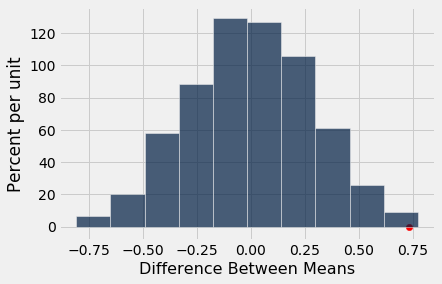

In [18]:
Table().with_column('Difference Between Means', differences).hist()
plots.scatter(observed_difference, 0, color='red', s=40);

In [19]:
np.count_nonzero(differences >= observed_difference) / 20000

0.00185